In [21]:
import plotly.graph_objs as go
import plotly.express as px
from plotly import tools, subplots
import numpy as np
import pandas as pd
import ipywidgets as widgets
import math
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from ipywidgets import interact, interactive, fixed, interact_manual
init_notebook_mode(connected=True)
import scipy.io as sio
import pickle

## T1 values Before B1 correction

In [6]:
derivativesDir = '/Users/agah/Desktop/KuzuData/PHD_DATA/ds-venus/derivatives/qMRLab/sub-invivo/'

spheres = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
refMean = [1.989,1.454,0.9841,0.706,0.4967,0.3515,0.24713,0.1753,0.1259,0.089]


sessions = ['rth750retest','rth750test','rthPRIretest','rthPRItest','rthSKYretest','rthSKYtest',
        'vendor750retest','vendor750test','vendorPRIretest','vendorPRItest','vendorSKYretest','vendorSKYtest']

convert_tag = {'rth750':'G1<sub>neutral</sub>','rthPRI':'S1<sub>neutral</sub>','rthSKY':'S2<sub>neutral</sub>',
               'vendor750':'G1<sub>native</sub>','vendorPRI':'S1<sub>native</sub>','vendorSKY':'S2<sub>native</sub>'
              }
# 'rth750':
colors = {'rth750':'rgba(255,8,30,1)','rthPRI':'rgba(255,117,0,1)','rthSKY':'rgba(255,220,0,1)',
         'vendor750':'rgba(0,75,255,1)','vendorPRI':'rgba(24,231,234,1)','vendorSKY':'rgba(24,234,141,1)'}

colors_line = {'rth750':'rgba(255,8,30,0.35)','rthPRI':'rgba(255,117,0,0.35)','rthSKY':'rgba(255,220,0,0.35)',
         'vendor750':'rgba(0,75,255,0.35)','vendorPRI':'rgba(24,231,234,0.35)','vendorSKY':'rgba(24,234,141,0.35)'}

df = pd.DataFrame()

fig = go.Figure()

regions = ['WM']

for jj in range(0,len(sessions),2):
    avg_array  = []
    std_array  =  []
    for ii in range(len(regions)):
        # Each one of these contains B1, MTsat, T1 and T1cor
        cur_region_test = derivativesDir + 'ses-' + sessions[jj] + '/stat/sub-invivo_ses-' + sessions[jj] + '_desc-' + regions[ii] + '_metrics.mat'
        cur_region_retest = derivativesDir + 'ses-' + sessions[jj+1] + '/stat/sub-invivo_ses-' + sessions[jj+1] + '_desc-' + regions[ii] + '_metrics.mat'
        cur_contents_test = sio.loadmat(cur_region_test)
        cur_contents_retest = sio.loadmat(cur_region_retest)
        cur_contents_avg = np.mean(np.array([cur_contents_test['T1'].flatten(),cur_contents_retest['T1'].flatten()]),axis=0)
        cur_contents_avg = np.delete(cur_contents_avg, np.where(cur_contents_avg < 0))
        #cur_contents_avg = np.delete(cur_contents_avg, np.where(cur_contents_avg > 5))
        cur_tag = sessions[jj][0:-6]
        fig.add_trace(go.Box(y=cur_contents_avg,
        line_color=colors[cur_tag],
        name = convert_tag[cur_tag],
        jitter=0.5,
        marker=dict(
        opacity = 0.4,    
        outliercolor='rgba(255, 255, 255, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
        pointpos=-1.8,
        boxpoints='all',
        boxmean = 'sd'
        ))
        

fig.update_layout(height=500, width=1000, paper_bgcolor='#000000',plot_bgcolor='#000000')
fig.update_layout(legend=dict(x=1, y=1,tracegroupgap=300,font=dict(color="white")))
axis_template = dict(linecolor = 'black', showticklabels = True,
             tickfont=dict(color="white"), gridcolor = 'rgb(20,20,20)',zerolinecolor = 'rgb(40,40,40)' )
fig.update_xaxes(axis_template)
fig.update_yaxes(axis_template,gridcolor = 'rgb(60,60,60)')

fig.update_yaxes(range=[0,3.5])
fig.update_layout(title='White-matter T1 (s) | No B1 correction',title_font_color="white")

plot(fig)
 

'temp-plot.html'

## AVG

In [19]:
cur_region_test = derivativesDir + 'ses-' + sessions[0] + '/stat/sub-invivo_ses-' + sessions[0] + '_desc-' + regions[0] + '_metrics.mat'
cur_region_retest = derivativesDir + 'ses-' + sessions[1] + '/stat/sub-invivo_ses-' + sessions[1] + '_desc-' + regions[0] + '_metrics.mat'
cur_contents_test = sio.loadmat(cur_region_test)
cur_contents_retest = sio.loadmat(cur_region_retest)
cur_contents_avg = np.mean(np.array([cur_contents_test['T1'].flatten(),cur_contents_retest['T1'].flatten()]),axis=0)

In [20]:
cur_contents_avg

array([1.7123552 , 1.72057287, 1.49532312, ..., 1.19774829, 1.33211133,
       1.20815365])

/Users/agah/opt/anaconda3/envs/jbnew/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/agah/opt/anaconda3/envs/jbnew/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/agah/opt/anaconda3/envs/jbnew/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/agah/opt/anaconda3/envs/jbnew/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:

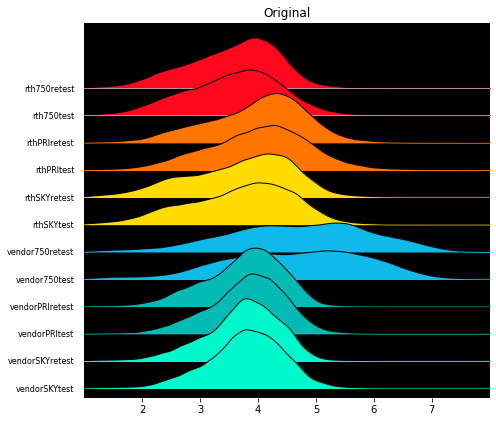

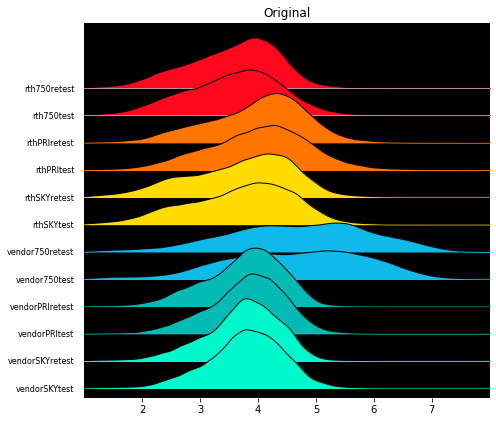

In [39]:
import joypy
import random
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

derivativesDir = '/Users/agah/Desktop/KuzuData/PHD_DATA/ds-venus/derivatives/qMRLab/sub-invivo/'


#sessions = ['rth750retest','rth750test','rthPRIretest','rthPRItest','rthSKYretest','rthSKYtest',
#        'vendor750retest','vendor750test','vendorPRIretest','vendorPRItest','vendorSKYretest','vendorSKYtest']

sessions = ['rth750retest','rth750test','rthPRIretest','rthPRItest','rthSKYretest','rthSKYtest',
        'vendor750retest','vendor750test','vendorPRIretest','vendorPRItest','vendorSKYretest','vendorSKYtest']

colors = {'rth750':'rgba(255,8,30,1)','rthPRI':'rgba(255,117,0,1)','rthSKY':'rgba(255,220,0,1)',
         'vendor750':'rgba(0,75,255,1)','vendorPRI':'rgba(24,231,234,1)','vendorSKY':'rgba(24,234,141,1)'}

colorr = ['#ff081e','#ff081e','#ff7500','#ff7500','#ffdc00','#ffdc00','#0dbae9','#0dbae9','#03bbb4','#03bbb4','#00f8cd','#00f8cd']

#colorr = ['#ff081e','#ff081e','#ff7500','#ff7500','#ffdc00','#ffdc00','#03bbb4','#03bbb4','#00f8cd','#00f8cd']

regions = ['WM']
aa = []
bb=[]

for jj in range(len(sessions)):
    for ii in range(len(regions)):
        cur_region = derivativesDir + 'ses-' + sessions[jj] + '/stat/sub-invivo_ses-' + sessions[jj] + '_desc-' + regions[ii] + '_metrics.mat'
        cur_contents = sio.loadmat(cur_region)
        curVec = list(cur_contents['MTsat'].flatten())
        if len(curVec) == 0:   
            curVec = list(cur_contents['MTsat'].flatten())
        curVec = [i for i in curVec if not i < 1]
        curVec = [i for i in curVec if not i > 8]
        #dede = list.remove(curVec,curVec[curVec<0])
        #curVec = np.delete(curVec, np.where(curVec < 0))
        #curVec = np.delete(curVec, np.where(curVec > 3))
        #print(len(curVec))
        curVec = random.choices(curVec,k=50000)
        aa.append(curVec)
        bb.append([sessions[jj]]*len(curVec))      

aa = np.array(aa)
bb = np.array(bb)    
aa = aa.flatten()
bb = bb.flatten()
dat = {'str':aa,'lbl':bb}
df = pd.DataFrame(data=dat)

## 0.5 to 2 for T1 50k | range 0 and 3 
## 35 to 70 for MTR 50k | range 0 bigger
## 1 to 8 for MTsat 50k | range 1 and 8

fig, ax = joypy.joyplot(df, by="lbl", column="str", range_style='all',x_range=[1,8], 
                              grid='y', linewidth=1, legend=False, fade=False, figsize=(7,6),
                              title='Original',
                              kind="kde", bins=20,background='k',colormap = ListedColormap(colorr),ylabelsize=8,linecolor="black")

fig

In [40]:
len(curVec)

50000

In [10]:
data.shape

(12, 200)

## T1 values After B1 correction

In [ ]:
derivativesDir = '/Users/agah/Desktop/KuzuData/PHD_DATA/ds-venus/derivatives/qMRLab/sub-invivo/'

spheres = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
refMean = [1.989,1.454,0.9841,0.706,0.4967,0.3515,0.24713,0.1753,0.1259,0.089]


sessions = ['rth750retest','rth750test','rthPRIretest','rthPRItest','rthSKYretest','rthSKYtest',
            'vendorPRIretest','vendorPRItest','vendorSKYretest','vendorSKYtest']

convert_tag = {'rth750':'G1<sub>neutral</sub>','rthPRI':'S1<sub>neutral</sub>','rthSKY':'S2<sub>neutral</sub>',
               'vendor750':'G1<sub>native</sub>','vendorPRI':'S1<sub>native</sub>','vendorSKY':'S2<sub>native</sub>'
              }
# 'rth750':
colors = {'rth750':'rgba(255,8,30,1)','rthPRI':'rgba(255,117,0,1)','rthSKY':'rgba(255,220,0,1)',
         'vendor750':'rgba(0,75,255,1)','vendorPRI':'rgba(24,231,234,1)','vendorSKY':'rgba(24,234,141,1)'}

colors_line = {'rth750':'rgba(255,8,30,0.35)','rthPRI':'rgba(255,117,0,0.35)','rthSKY':'rgba(255,220,0,0.35)',
         'vendor750':'rgba(0,75,255,0.35)','vendorPRI':'rgba(24,231,234,0.35)','vendorSKY':'rgba(24,234,141,0.35)'}

df = pd.DataFrame()

fig = go.Figure()

regions = ['WM']

for jj in range(0,len(sessions),2):
    avg_array  = []
    std_array  =  []
    for ii in range(len(regions)):
        # Each one of these contains B1, MTsat, T1 and T1cor
        cur_region_test = derivativesDir + 'ses-' + sessions[jj] + '/stat/sub-invivo_ses-' + sessions[jj] + '_desc-' + regions[ii] + '_metrics.mat'
        cur_region_retest = derivativesDir + 'ses-' + sessions[jj+1] + '/stat/sub-invivo_ses-' + sessions[jj+1] + '_desc-' + regions[ii] + '_metrics.mat'
        cur_contents_test = sio.loadmat(cur_region_test)
        cur_contents_retest = sio.loadmat(cur_region_retest)
        cur_contents_avg = np.mean(np.array([cur_contents_test['T1cor'].flatten(),cur_contents_retest['T1cor'].flatten()]),axis=0)
        cur_contents_avg = np.delete(cur_contents_avg, np.where(cur_contents_avg < 0))
        cur_contents_avg = np.delete(cur_contents_avg, np.where(cur_contents_avg > 5))
        cur_tag = sessions[jj][0:-6]
        fig.add_trace(go.Box(y=cur_contents_avg,
        line_color=colors[cur_tag],
        name = convert_tag[cur_tag],
        jitter=0.5,
        marker=dict(
        opacity = 0.4,    
        outliercolor='rgba(255, 255, 255, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
        pointpos=-1.8,
        boxpoints='all',
        boxmean = 'sd'
        ))
        

fig.update_layout(height=500, width=1000, paper_bgcolor='#000000',plot_bgcolor='#000000')
fig.update_layout(legend=dict(x=1, y=1,tracegroupgap=300,font=dict(color="white")))
axis_template = dict(linecolor = 'black', showticklabels = True,
             tickfont=dict(color="white"), gridcolor = 'rgb(20,20,20)',zerolinecolor = 'rgb(40,40,40)' )
fig.update_xaxes(axis_template)
fig.update_yaxes(axis_template,gridcolor = 'rgb(60,60,60)')

fig.update_layout(title='White-matter T1 (s) | B1 corrected',title_font_color="white")

plot(fig)
 

## Percent dif Before B1 correction

In [ ]:
derivativesDir = '/Users/agah/Desktop/KuzuData/PHD_DATA/ds-venus/derivatives/qMRLab/sub-phantom/'

spheres = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
refMean = [1.989,1.454,0.9841,0.706,0.4967,0.3515,0.24713,0.1753,0.1259,0.089]


sessions = ['rth750retest','rth750test','rthPRIretest','rthPRItest','rthSKYretest','rthSKYtest',
        'vendor750retest','vendor750test','vendorPRIretest','vendorPRItest','vendorSKYretest','vendorSKYtest']

convert_tag = {'rth750':'G1<sub>neutral</sub>','rthPRI':'S1<sub>neutral</sub>','rthSKY':'S2<sub>neutral</sub>',
               'vendor750':'G1<sub>native</sub>','vendorPRI':'S1<sub>native</sub>','vendorSKY':'S2<sub>native</sub>'
              }
# 'rth750':
colors = {'rth750':'rgba(255,8,30,1)','rthPRI':'rgba(255,117,0,1)','rthSKY':'rgba(255,220,0,1)',
         'vendor750':'rgba(0,75,255,1)','vendorPRI':'rgba(24,231,234,1)','vendorSKY':'rgba(24,234,141,1)'}

colors_line = {'rth750':'rgba(255,8,30,0.35)','rthPRI':'rgba(255,117,0,0.35)','rthSKY':'rgba(255,220,0,0.35)',
         'vendor750':'rgba(0,75,255,0.35)','vendorPRI':'rgba(24,231,234,0.35)','vendorSKY':'rgba(24,234,141,0.35)'}

df = pd.DataFrame()

fig = go.Figure()


for jj in range(0,len(sessions),2):
    avg_array  = []
    std_array  =  []
    pctdif = []
    for ii in range(len(spheres)):
        # Each one of these contains B1, MTsat, T1 and T1cor
        cur_sphere_test = derivativesDir + 'ses-' + sessions[jj] + '/stat/sub-phantom_ses-' + sessions[jj] + '_desc-sphere' + str(spheres[ii]) + '_metrics.mat'
        cur_sphere_retest = derivativesDir + 'ses-' + sessions[jj+1] + '/stat/sub-phantom_ses-' + sessions[jj+1] + '_desc-sphere' + str(spheres[ii]) + '_metrics.mat'
        cur_contents_test = sio.loadmat(cur_sphere_test)
        cur_contents_retest = sio.loadmat(cur_sphere_retest)
        cur_tag = sessions[jj][0:-6]
        cur_val = np.mean([cur_contents_test['T1'].flatten().mean(),cur_contents_retest['T1'].flatten().mean()])
        pctdif.append((abs(cur_val-refMean[ii])/(np.mean([cur_val,refMean[ii]])))*100) 
        std_array.append(np.mean([cur_contents_test['T1'].flatten().std(),cur_contents_retest['T1'].flatten().std()]))
    #df[cur_tag + '_mean'] = avg_array
    #df[cur_tag + '_std'] = std_array
    #upper = list(np.squeeze(np.array(avg_array)) + np.squeeze(np.array(std_array)))
    #lower = list(np.squeeze(np.array(avg_array)) - np.squeeze(np.array(std_array)))
    # Add markers
    fig.add_trace(go.Scatter(
    x=spheres, y=pctdif,
    line_color=colors[cur_tag],
    name= convert_tag[cur_tag],
    marker = dict(size=10),
    ))


fig.update_layout(height=500, width=1000, paper_bgcolor='#000000',plot_bgcolor='#000000')
fig.update_layout(legend=dict(x=1, y=1,tracegroupgap=300,font=dict(color="white")))
axis_template = dict(linecolor = 'black', showticklabels = True,
             tickfont=dict(color="white"), gridcolor = 'rgb(20,20,20)',zerolinecolor = 'rgb(40,40,40)' )
fig.update_xaxes(axis_template)
fig.update_yaxes(axis_template,gridcolor = 'rgb(60,60,60)')

#plot_y = [2.5,1.989,1.454,0.9841,0.706,0.4967,0.3515,0.24713,0.1753,0.1259,0.089]

fig.update_yaxes(range=[-1,45])
fig.update_xaxes(tickvals=spheres)

fig.update_layout(title='Percent difference | No B1 correction',title_font_color="white",)

plot(fig)

## Percent error after B1

In [ ]:
derivativesDir = '/Users/agah/Desktop/KuzuData/PHD_DATA/ds-venus/derivatives/qMRLab/sub-phantom/'

spheres = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
refMean = [1.989,1.454,0.9841,0.706,0.4967,0.3515,0.24713,0.1753,0.1259,0.089]


sessions = ['rth750retest','rth750test','rthPRIretest','rthPRItest','rthSKYretest','rthSKYtest',
            'vendorPRIretest','vendorPRItest','vendorSKYretest','vendorSKYtest']

convert_tag = {'rth750':'G1<sub>neutral</sub>','rthPRI':'S1<sub>neutral</sub>','rthSKY':'S2<sub>neutral</sub>',
               'vendor750':'G1<sub>native</sub>','vendorPRI':'S1<sub>native</sub>','vendorSKY':'S2<sub>native</sub>'
              }
# 'rth750':
colors = {'rth750':'rgba(255,8,30,1)','rthPRI':'rgba(255,117,0,1)','rthSKY':'rgba(255,220,0,1)',
         'vendor750':'rgba(0,75,255,1)','vendorPRI':'rgba(24,231,234,1)','vendorSKY':'rgba(24,234,141,1)'}

colors_line = {'rth750':'rgba(255,8,30,0.35)','rthPRI':'rgba(255,117,0,0.35)','rthSKY':'rgba(255,220,0,0.35)',
         'vendor750':'rgba(0,75,255,0.35)','vendorPRI':'rgba(24,231,234,0.35)','vendorSKY':'rgba(24,234,141,0.35)'}

df = pd.DataFrame()

fig = go.Figure()


for jj in range(0,len(sessions),2):
    avg_array  = []
    std_array  =  []
    pctdif = []
    for ii in range(len(spheres)):
        # Each one of these contains B1, MTsat, T1 and T1cor
        cur_sphere_test = derivativesDir + 'ses-' + sessions[jj] + '/stat/sub-phantom_ses-' + sessions[jj] + '_desc-sphere' + str(spheres[ii]) + '_metrics.mat'
        cur_sphere_retest = derivativesDir + 'ses-' + sessions[jj+1] + '/stat/sub-phantom_ses-' + sessions[jj+1] + '_desc-sphere' + str(spheres[ii]) + '_metrics.mat'
        cur_contents_test = sio.loadmat(cur_sphere_test)
        cur_contents_retest = sio.loadmat(cur_sphere_retest)
        cur_tag = sessions[jj][0:-6]
        cur_val = np.mean([cur_contents_test['T1cor'].flatten().mean(),cur_contents_retest['T1cor'].flatten().mean()])
        pctdif.append((abs(cur_val-refMean[ii])/(np.mean([cur_val,refMean[ii]])))*100) 
        std_array.append(np.mean([cur_contents_test['T1cor'].flatten().std(),cur_contents_retest['T1cor'].flatten().std()]))
    #df[cur_tag + '_mean'] = avg_array
    #df[cur_tag + '_std'] = std_array
    #upper = list(np.squeeze(np.array(avg_array)) + np.squeeze(np.array(std_array)))
    #lower = list(np.squeeze(np.array(avg_array)) - np.squeeze(np.array(std_array)))
    # Add markers
    fig.add_trace(go.Scatter(
    x=spheres, y=pctdif,
    line_color=colors[cur_tag],
    name= convert_tag[cur_tag],
    marker = dict(size=10),
    ))


fig.update_layout(height=500, width=1000, paper_bgcolor='#000000',plot_bgcolor='#000000')
fig.update_layout(legend=dict(x=1, y=1,tracegroupgap=300,font=dict(color="white")))
axis_template = dict(linecolor = 'black', showticklabels = True,
             tickfont=dict(color="white"), gridcolor = 'rgb(20,20,20)',zerolinecolor = 'rgb(40,40,40)' )
fig.update_xaxes(axis_template)
fig.update_yaxes(axis_template,gridcolor = 'rgb(60,60,60)')

#plot_y = [2.5,1.989,1.454,0.9841,0.706,0.4967,0.3515,0.24713,0.1753,0.1259,0.089]

fig.update_yaxes(range=[-1,45])
fig.update_xaxes(tickvals=spheres)

fig.update_layout(title='Percent difference | B1 corrected',title_font_color="white",)


plot(fig)